# Part 1: Web scraping
In the first part, I will use web scraping techniques to get the training data for my machine learning model. The training set will consist of data from three different web pages from https://www.basketball-reference.com. This will create the following three seperate csv-files:

* The first csv will contain the stats for every seasons MVP since 1991. 
* The second csv will contain stats for every player in the NBA since 1991.
* The third csv will contain every teams final standing since 1991. This is included because team record has be shown to play an important role for deciding each seasons MVP.

In this case, year 1991 refers to the 1990/1991 season. Since the MVP award is given in the second half of the season it makes sense to call each season by its second year.
 
I will use Requests and Selenium to dowload html files and Beautiful Soup to parse the html files.

## MVP stats

### Downloading the data

I will start by importing, Requests, Python's API module. I'm going to use this to access the website, download the html pages and save them as html files in a folder called "mvp".

It's a good idea to always download the data that you are going to work with. One ould make API calls every time to access the data instead of downloading it. However, there are several potential drawbacks to this approach.

Firstly, relying on API calls means that you are dependent on the availability and reliability of the API. Any changes or issues with the API could impact your ability to access the data.

Secondly, making frequent API calls can be time-consuming and may slow down your analysis. Additionally, some APIs may have usage limits or require authentication, which could add additional complexity to your workflow.

Finally, by relying on API calls, you may not have control over the data that you are analyzing. The API may only provide a subset of the data or may apply certain filters or transformations that you cannot control. By downloading the data, you have complete control over how it is transformed and analyzed.

In [132]:
import requests

In [133]:
years = list(range(1991, 2024))

In [134]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html" # The squirly brackets gets replaced with whatever is included in .format(...)

In [82]:
for year in years:
    url = url_start.format(year)
    data = requests.get(url) # This returns all the data on the page
    
    with open("mvp/{}.html".format(year), "w+") as f: # w+ means overwrite
        f.write(data.text)

### Parsing the data

I'm using the Beautiful Soup library to parse the web files that I downloaded to the "mvp"-folder.

In [89]:
from bs4 import BeautifulSoup

Testing it first on one year.

In [92]:
with open("mvp/1991.html") as f:
    page = f.read()

The `page` variable now contains html code. This content has to be parsed in order to do any further data extraction. To do this, I will be creating an html parser using soup.

A html parser is a tool that is used to parse or extract data from html code. It is particularly useful when scraping data from websites, as it allows the user to easily extract relevant data.

In [93]:
soup = BeautifulSoup(page, "html.parser")

### Analyzing the data

By opening the html file in JupyterLab, I can inspect the different html objects and tags in the file (using the Inspect function in Chrome). The header row is something that will mess up my final csv file. Therefore, I'm removing it by using the `.decompose` method with the class for the html object as input in combination with the `.find` method 

After some digging I found that element was under "tr" (table row) having class_ = "over_header".

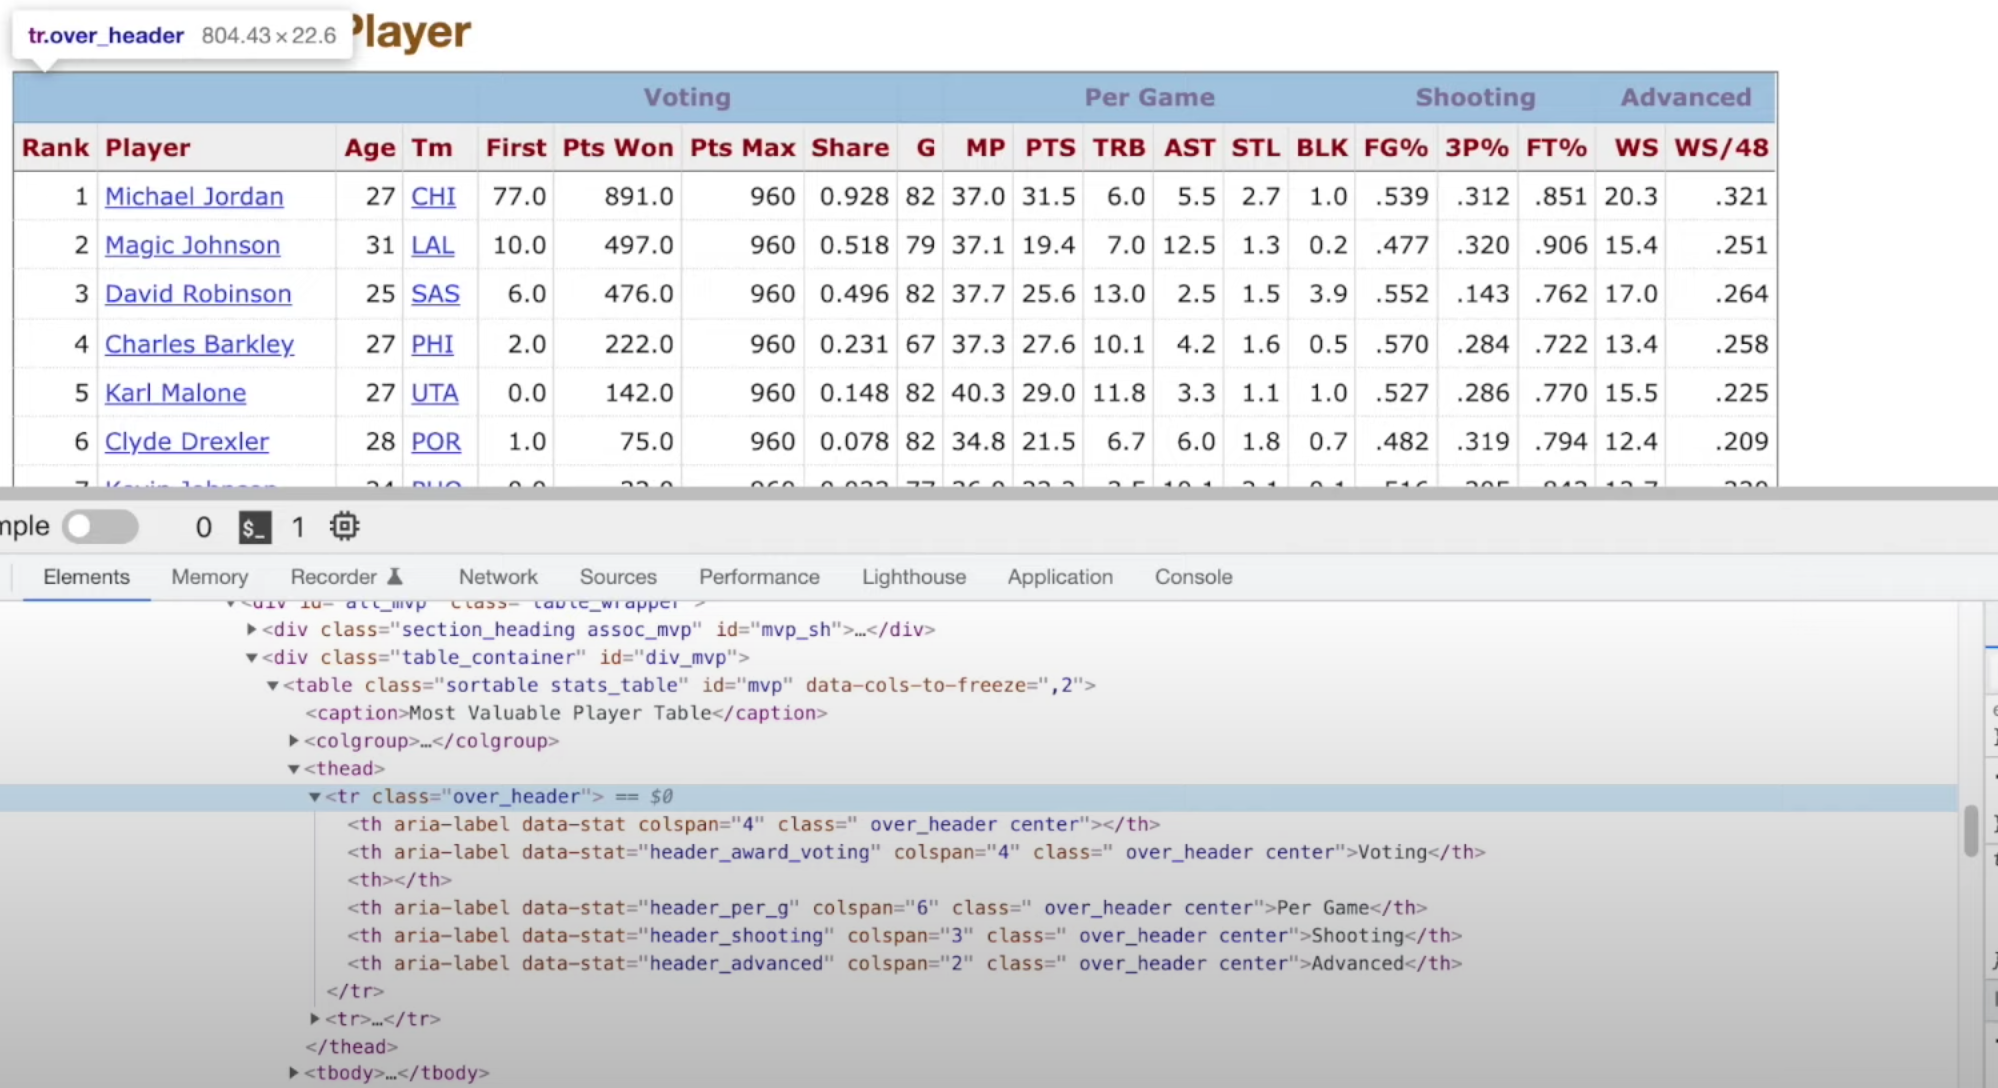

In [94]:
soup.find("tr", class_ = "over_header").decompose()

To extract the data, I will agian use soups's `.find` method. I only want the MVP table from the web page. After doing some searching, I find that the table of interest has id=mvp. This will be my input for the `.find` method.

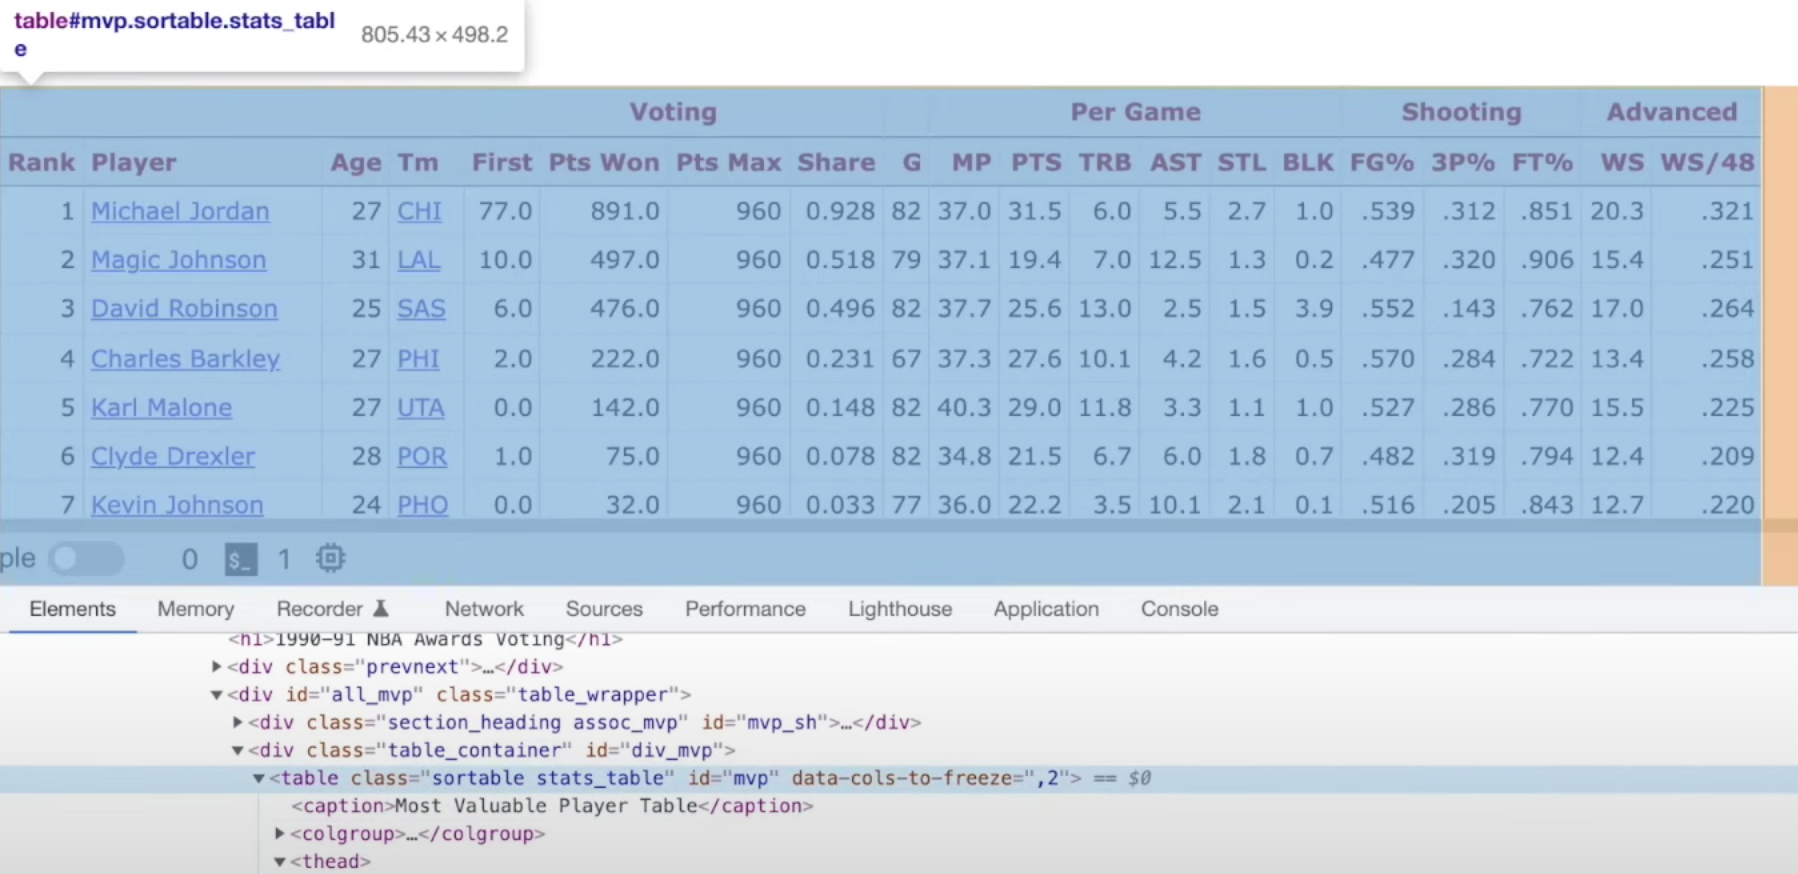

In [95]:
mvp_table = soup.find(id = "mvp")

To see if it turned out the way I wanted, I have to convert the html string into a Pandas dataframe (df) using the `.read_html()` method. The `.read_html()` method takes a URL as input or an html string, and returns a list of all the tables found in the html code.

In [96]:
import pandas as pd

In [97]:
mvp_1991 = pd.read_html(str(mvp_table))[0]

In [98]:
mvp_1991

Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0     1     Michael Jordan   27  CHI   77.0    891.0      960  0.928  82   
1     2      Magic Johnson   31  LAL   10.0    497.0      960  0.518  79   
2     3     David Robinson   25  SAS    6.0    476.0      960  0.496  82   
3     4    Charles Barkley   27  PHI    2.0    222.0      960  0.231  67   
4     5        Karl Malone   27  UTA    0.0    142.0      960  0.148  82   
5     6      Clyde Drexler   28  POR    1.0     75.0      960  0.078  82   
6     7      Kevin Johnson   24  PHO    0.0     32.0      960  0.033  77   
7     8  Dominique Wilkins   31  ATL    0.0     29.0      960  0.030  81   
8    9T         Larry Bird   34  BOS    0.0     25.0      960  0.026  60   
9    9T       Terry Porter   27  POR    0.0     25.0      960  0.026  81   
10   11      Patrick Ewing   28  NYK    0.0     20.0      960  0.021  81   
11   12      John Stockton   28  UTA    0.0     15.0      960  0.016  82   
12   13       Isiah Thomas   29  DET    0.0     11.0      960  0.011  48   
13   14      Robert Parish   37  BOS    0.0     10.0      960  0.010  81   
14   15         Joe Dumars   27  DET    0.0      8.0      960  0.008  80   
15   16       Bernard King   34  WSB    0.0      7.0      960  0.007  64   
16   17        Kenny Smith   25  HOU    0.0      5.0      960  0.005  78   
17   18    Hakeem Olajuwon   28  HOU    0.0      4.0      960  0.004  56   
18  19T       Tim Hardaway   24  GSW    0.0      1.0      960  0.001  82   
19  19T       Kevin McHale   33  BOS    0.0      1.0      960  0.001  68   

      MP   PTS   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  
0   37.0  31.5   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321  
1   37.1  19.4   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251  
2   37.7  25.6  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264  
3   37.3  27.6  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258  
4   40.3  29.0  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225  
5   34.8  21.5   6.7   6.0  1.8  0.7  0.482  0.319  0.794  12.4  0.209  
6   36.0  22.2   3.5  10.1  2.1  0.1  0.516  0.205  0.843  12.7  0.220  
7   38.0  25.9   9.0   3.3  1.5  0.8  0.470  0.341  0.829  11.4  0.177  
8   38.0  19.4   8.5   7.2  1.8  1.0  0.454  0.389  0.891   6.6  0.140  
9   32.9  17.0   3.5   8.0  2.0  0.1  0.515  0.415  0.823  13.0  0.235  
10  38.3  26.6  11.2   3.0  1.0  3.2  0.514  0.000  0.745  10.0  0.155  
11  37.8  17.2   2.9  14.2  2.9  0.2  0.507  0.345  0.836  14.0  0.217  
12  34.5  16.2   3.3   9.3  1.6  0.2  0.435  0.292  0.782   3.4  0.098  
13  30.1  14.9  10.6   0.8  0.8  1.3  0.598  0.000  0.767  10.0  0.198  
14  38.1  20.4   2.3   5.5  1.1  0.1  0.481  0.311  0.890   9.9  0.155  
15  37.5  28.4   5.0   4.6  0.9  0.3  0.472  0.216  0.790   3.5  0.070  
16  34.6  17.7   2.1   7.1  1.4  0.1  0.520  0.363  0.844   9.0  0.161  
17  36.8  21.2  13.8   2.3  2.2  3.9  0.508  0.000  0.769   8.6  0.201  
18  39.2  22.9   4.0   9.7  2.6  0.1  0.476  0.385  0.803   9.9  0.148  
19  30.4  18.4   7.1   1.9  0.4  2.1  0.553  0.405  0.829   7.9  0.182

Looks good!

In this dataset the most important columns are the ones referencing how the MVP voting for that player went. These are 'Pts Won', 'Pts Max' and 'Share'.

* 'Pts Won': This is the amount of points that the player got in the MVP voting that year. The player with most points is that years MVP.
* 'Pts Max': This is the total number of points that were given that year.
* 'Share': This is the share of points that the player got. This is 'Pts Won'/'Pts Max'. 

In [35]:
mvp_1991.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48'],
      dtype='object')

Next, I'm doing the same thing but for every year (not only 1991). I will use a for loop and modify some of the code above. Each df (one for each year) will be put into a list named dfs. 

I'm also including a column "Year", telling me which page the data is from. This is a very important concept when doing web scraping. You always need to include a reference to which html page the data comes from.

In [135]:
dfs = []

for year in years:
    with open("mvp/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr", class_ = "over_header").decompose()
    mvp_table = soup.find(id = "mvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = year
    
    dfs.append(mvp) # List of dataframes

Then, I'm turning each df into one large df using `.concat`.

In [139]:
mvps = pd.concat(dfs)

In [141]:
mvps.head()

Rank           Player  Age   Tm  First  Pts Won  Pts Max  Share   G    MP  \
0    1   Michael Jordan   27  CHI   77.0    891.0      960  0.928  82  37.0   
1    2    Magic Johnson   31  LAL   10.0    497.0      960  0.518  79  37.1   
2    3   David Robinson   25  SAS    6.0    476.0      960  0.496  82  37.7   
3    4  Charles Barkley   27  PHI    2.0    222.0      960  0.231  67  37.3   
4    5      Karl Malone   27  UTA    0.0    142.0      960  0.148  82  40.3   

   ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year  
0  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321  1991  
1  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251  1991  
2  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264  1991  
3  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258  1991  
4  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225  1991  

[5 rows x 21 columns]

Lastly, I'm converting the large df into a csv file and saving it as "mvp.csv".

In [142]:
mvps.to_csv("mvps.csv")

## Player stats

I will download the data from https://www.basketball-reference.com/leagues/NBA_2021_per_game.html. However, there is a problem. Because the webpage uses javascript, the entire table won't load. So a simple GET-request will only give me about 17 rows of data (it's acutally 100s).

In [24]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [25]:
url = player_stats_url.format(1991)
data = requests.get(url)
with open("player/1991.html", "w+") as f:
    f.write(data.text)

This gives me the following html-file:

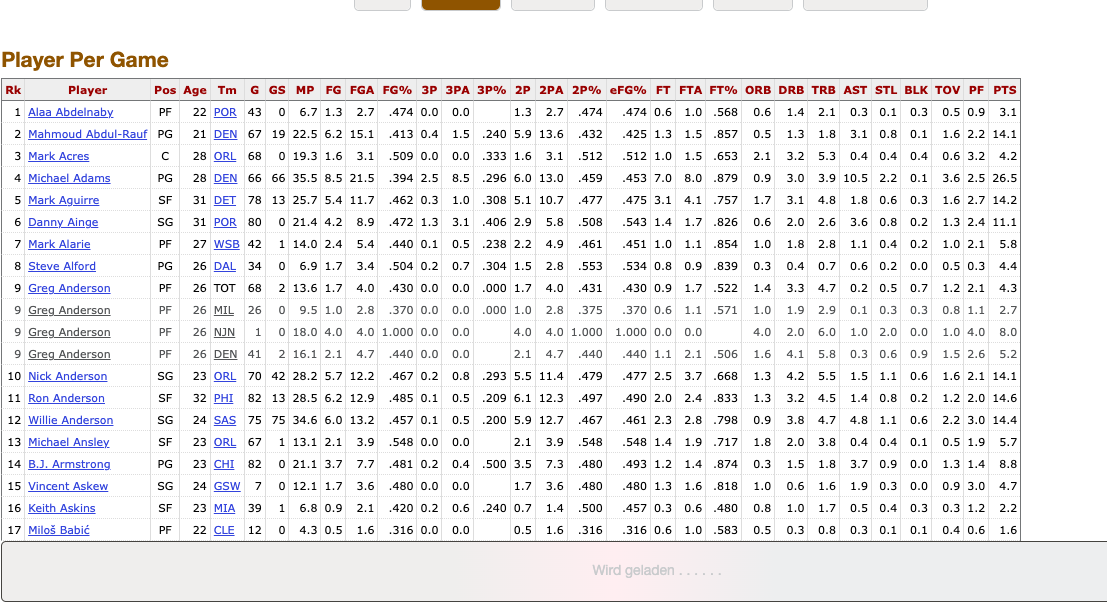

The reason for this is that the javascript page assumes that the page will be rendered again by the requestor in a web browser after the GET-request is sent. But this doesnt happen. I therefore need to use a browser to get the rest of the data. 

This is not an unusual problem when doing web scraping.

To achieve this, I will use Selenium. Selenium provides a Python API that allows me to interact with web pages and automate tasks like clicking buttons, filling out forms, and, for this case, scraping data from web pages based javascript.

### Downloading the data using Selenium

The following snippet will create a web browser which I can write to. And here, I can render the web page containing the player stats.

In [70]:
from selenium import webdriver

In [71]:
driver = webdriver.Safari()

First, I will test it on year 1991.

In [78]:
import time
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

year = 1991
url = player_stats_url.format(year)

driver.get(url) # Render the url in the browser
driver.execute_script("window.scrollTo(1, 15000)") # This is a Javascript command that tells the browser to scroll down the page, rendering the content.
time.sleep(2) # This is to give the javascript time to execute.

html = driver.page_source # This grabs the data from the html.

Then, I'm writing the data to file.

In [79]:
with open("player/{}.html".format(year), "w+") as f:
    f.write(html)

It worked! 

Next, I will do the same for every year using a loop.

In [37]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"
for year in years:
    url = player_stats_url.format(year)

    driver.get(url) # Render the url in the browser
    driver.execute_script("window.scrollTo(1, 15000)") # This is a Javascript command that tells the browser to scroll down the page, rendering the content.
    time.sleep(10) # This is to give the javascript time to execute. Got an error message when using 2 so I changed it to 10 after doing some research on this problem.

    html = driver.page_source # This grabs the data from the html.
    with open("player/{}.html".format(year), "w+") as f:
        f.write(html)

### Analyzing the data

Taking a look at the html files, I see that there are some repeating header rows in the file that I don't want in my dataframe. These are identified with the class = "thead" tag.

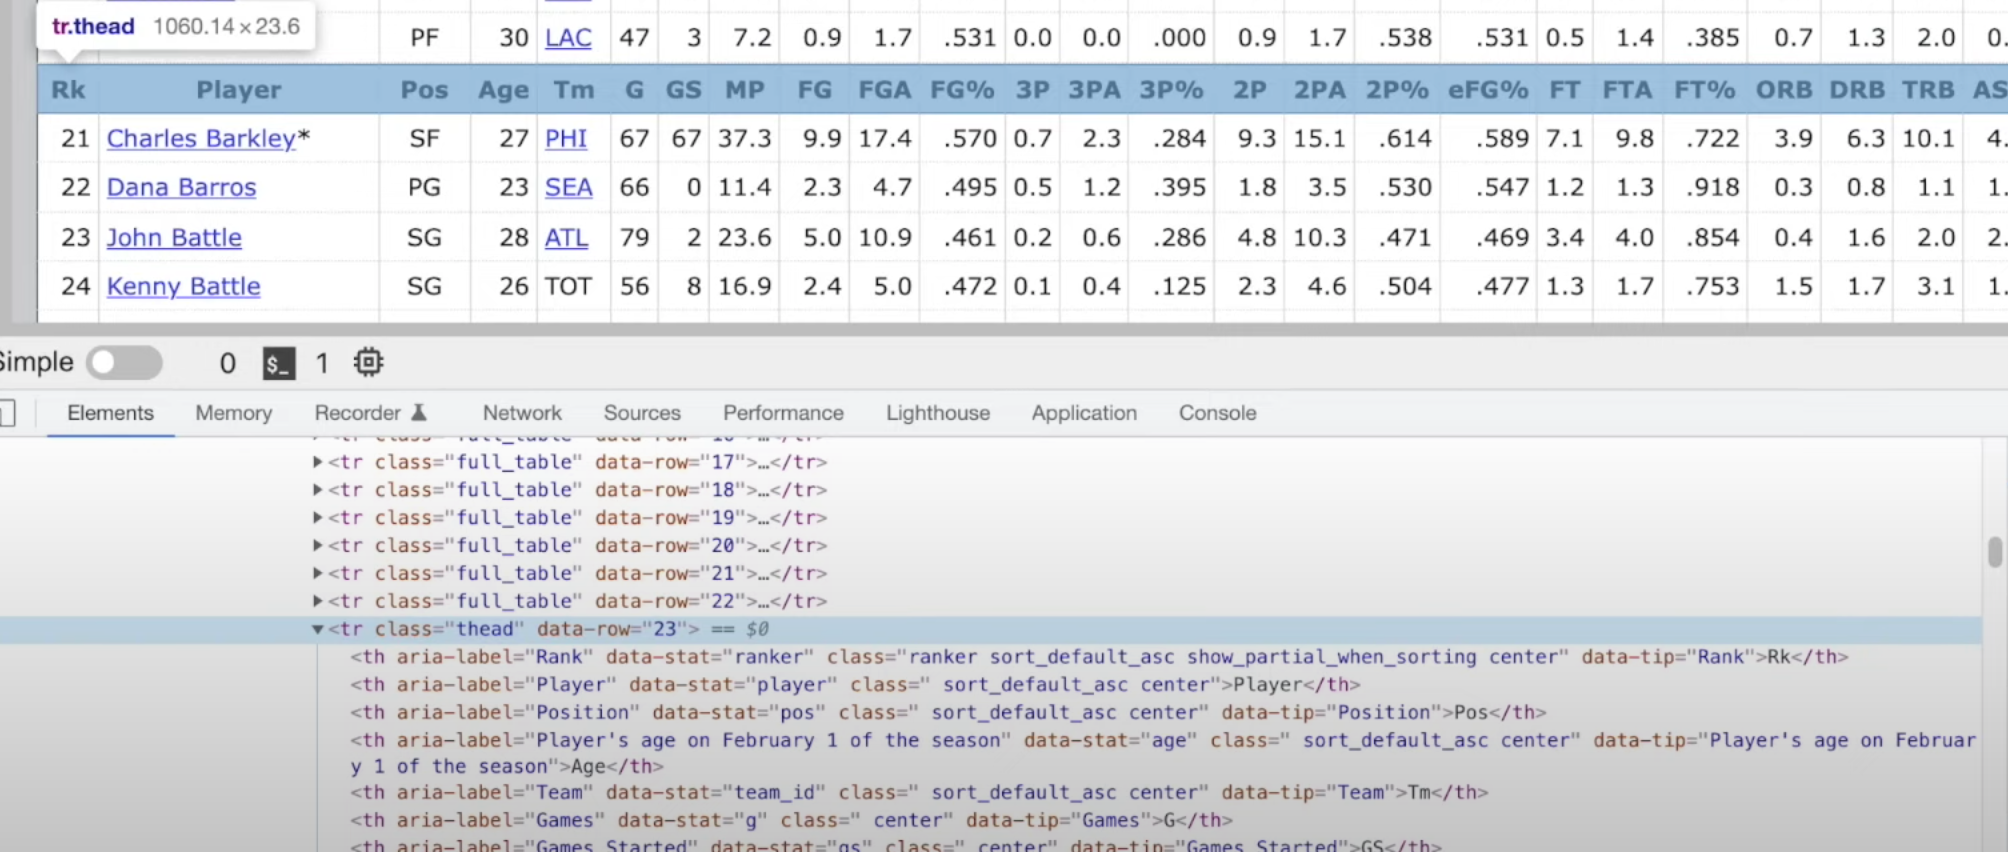

I also fint that the data of interest has id="per_game_stats".

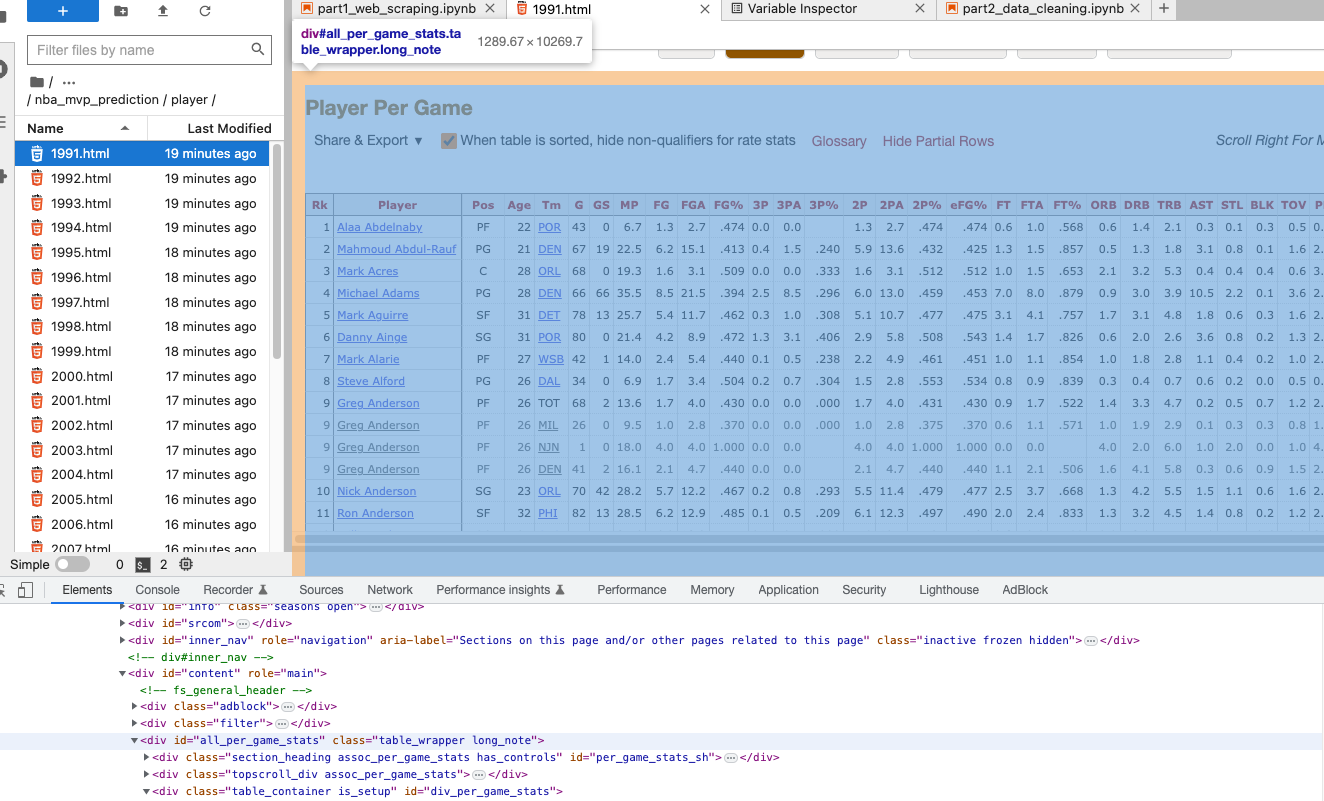

Knowing this, I can continue with parsing the files.

### Parsing the data

Again, first only for the year 1991.

In [76]:
year = 1991
with open("player/{}.html".format(year)) as f:
    page = f.read()
    
soup = BeautifulSoup(page, "html.parser")
soup.find("tr", class_ = "thead").decompose()
player_table = soup.find(id = "per_game_stats")
player = pd.read_html(str(player_table))[0]
player["Year"] = year

In [77]:
player.head()

Rk            Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  DRB  \
0  1  Precious Achiuwa   C  23  TOR  55  12  20.7  3.6   7.3  ...  1.8  4.1   
1  2      Steven Adams   C  29  MEM  42  42  27.0  3.7   6.3  ...  5.1  6.5   
2  3       Bam Adebayo   C  25  MIA  75  75  34.6  8.0  14.9  ...  2.5  6.7   
3  4      Ochai Agbaji  SG  22  UTA  59  22  20.5  2.8   6.5  ...  0.7  1.3   
4  5      Santi Aldama  PF  22  MEM  77  20  21.8  3.2   6.8  ...  1.1  3.7   

    TRB  AST  STL  BLK  TOV   PF   PTS  Year  
0   6.0  0.9  0.6  0.5  1.1  1.9   9.2  2023  
1  11.5  2.3  0.9  1.1  1.9  2.3   8.6  2023  
2   9.2  3.2  1.2  0.8  2.5  2.8  20.4  2023  
3   2.1  1.1  0.3  0.3  0.7  1.7   7.9  2023  
4   4.8  1.3  0.6  0.6  0.8  1.9   9.0  2023  

[5 rows x 31 columns]

... and then for every file:

In [143]:
dfs = []
for year in years:
    with open("player/{}.html".format(year)) as f:
        page = f.read()

    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr", class_ = "thead").decompose()
    player_table = soup.find(id = "per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    dfs.append(player)

In [144]:
players = pd.concat(dfs)

In [145]:
players.head()

Rk              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  DRB  \
0  1      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  ...  0.6  1.4   
1  2  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  ...  0.5  1.3   
2  3          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  ...  2.1  3.2   
3  4       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  ...  0.9  3.0   
4  5        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  ...  1.7  3.1   

   TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  

[5 rows x 31 columns]

In [146]:
players.tail()

Rk          Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  DRB  \
699  535  Thaddeus Young  PF  34  TOR  54   9  14.7  2.0   3.7  ...  1.3  1.8   
700  536      Trae Young  PG  24  ATL  73  73  34.8  8.2  19.0  ...  0.8  2.2   
701  537  Omer Yurtseven   C  24  MIA   9   0   9.2  1.8   3.0  ...  0.9  1.7   
702  538     Cody Zeller   C  30  MIA  15   2  14.5  2.5   3.9  ...  1.7  2.6   
703  539     Ivica Zubac   C  25  LAC  76  76  28.6  4.3   6.8  ...  3.1  6.8   

     TRB   AST  STL  BLK  TOV   PF   PTS  Year  
699  3.1   1.4  1.0  0.1  0.8  1.6   4.4  2023  
700  3.0  10.2  1.1  0.1  4.1  1.4  26.2  2023  
701  2.6   0.2  0.2  0.2  0.4  1.8   4.4  2023  
702  4.3   0.7  0.2  0.3  0.9  2.2   6.5  2023  
703  9.9   1.0  0.4  1.3  1.5  2.9  10.8  2023  

[5 rows x 31 columns]

Looks good! 

An explanation of what the different column names mean can be found here: https://www.basketball-reference.com/about/glossary.htmlhttps://www.basketball-reference.com/about/glossary.html

In [147]:
players.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

I will finish by converting it to a csv file, naming it players.csv.

In [148]:
players.to_csv("players.csv")

## Team Record
For this dataset, I will be using data from the Division Standings: https://www.basketball-reference.com/leagues/NBA_2022_standings.html

In [110]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

### Downloading the data
Firstly, only for 1991.

In [111]:
year = 1991
url = team_stats_url.format(year)

data = requests.get(url)

with open("team/{}.html".format(year), "w+") as f:
    f.write(data.text)

And then for all the years.

In [64]:
for year in years:
    url = team_stats_url.format(year)

    data = requests.get(url)

    with open("team/{}.html".format(year), "w+") as f:
        f.write(data.text)

### Analyzing the data

After doing some analysis of the html-files I see that I have to divide the tables into two tables because the NBA consists of two conferences (East and West). I also want to remove the header row having class_ = "thead". And after some more searching, I see that the data is contained in the html tables having id="divs_standings_E" and id="divs_standings_W".

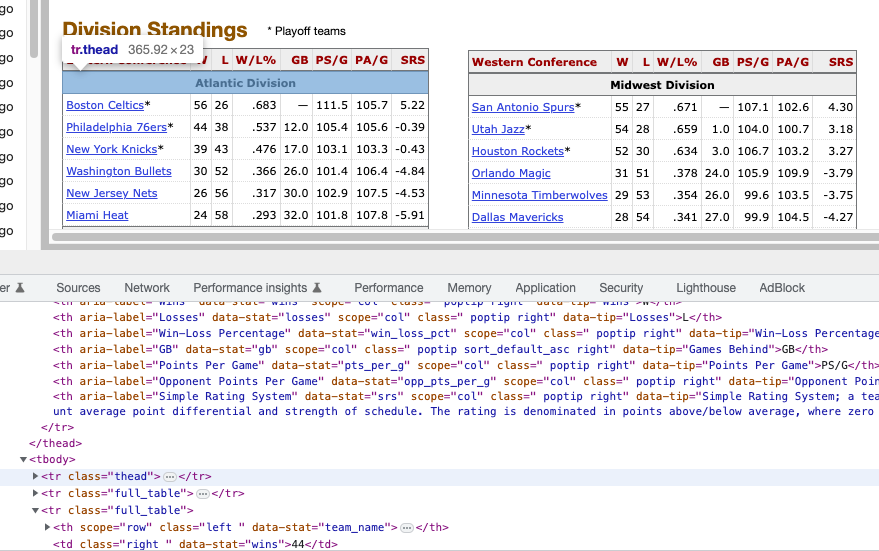

---

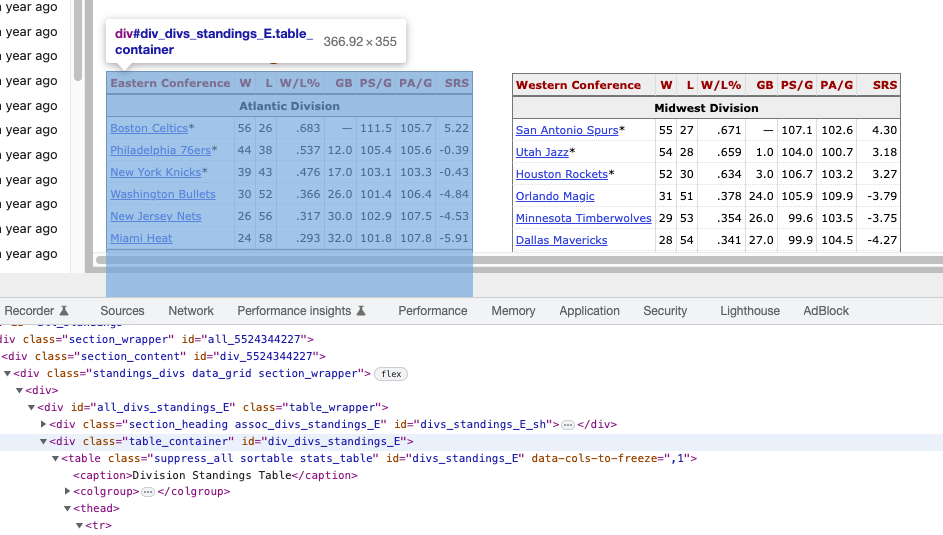

### Parsing the data


In [119]:
dfs = []

for year in years:
    with open("team/{}.html".format(year)) as f:
        page = f.read()

    # For Eastern Conference:
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr", class_ = "thead").decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"] # I don't need these columns anymore because I have made a one general Team column.
    dfs.append(team)

    # For Western Conference:
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr", class_ = "thead").decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"] # I don't need these columns anymore because I have made a one general Team column.
    dfs.append(team)


In [120]:
teams = pd.concat(dfs)

In [121]:
teams.head()

W   L  W/L%    GB   PS/G   PA/G    SRS  Year                 Team
0  56  26  .683     —  111.5  105.7   5.22  1991      Boston Celtics*
1  44  38  .537  12.0  105.4  105.6  -0.39  1991  Philadelphia 76ers*
2  39  43  .476  17.0  103.1  103.3  -0.43  1991     New York Knicks*
3  30  52  .366  26.0  101.4  106.4  -4.84  1991   Washington Bullets
4  26  56  .317  30.0  102.9  107.5  -4.53  1991      New Jersey Nets

In [122]:
teams.tail()

W   L  W/L%    GB   PS/G   PA/G    SRS  Year                       Team
13  51  31  .622     —  116.9  113.0   3.60  2023     Memphis Grizzlies* (2)
14  42  40  .512   9.0  114.4  112.5   1.63  2023  New Orleans Pelicans* (9)
15  38  44  .463  13.0  114.2  114.1  -0.14  2023      Dallas Mavericks (11)
16  22  60  .268  29.0  110.7  118.6  -7.62  2023       Houston Rockets (14)
17  22  60  .268  29.0  113.0  123.1  -9.82  2023     San Antonio Spurs (15)

Good!

For an explanation of what the column names mean you can use the same source as before: https://www.basketball-reference.com/about/glossary.htmlhttps://www.basketball-reference.com/about/glossary.html

In [123]:
teams.columns

Index(['W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Year', 'Team'], dtype='object')

Again – lastly, writing the dataframe to a csv file.

In [124]:
teams.to_csv("teams.csv")

In the next part, I will continue with the three csv files that I have created in this notebook. In that part, I will first do some data cleaning followed by some data analysis to gain insights from the data.